This Jupyter notebook is a property of the University of California and copyrighted by Dipak Ghosal. Only personal use for ECS 132 and ECS 256 classes is allowed. Uploading this to any shared site is a violation of the University of California copyright laws

# A Project on Covert Timing Channels

## Instructions

    1. You may in no circumstances upload this project to private tutoring websites such as CourseHero or Chegg. Remember all material related to this course  is a property of the University of California and posting them is a violation of the copyright laws and will lead to serious consequences. 
    
    2. In doing this project if you refer to a source (either a book or the internet), you must cite it.
    
    3. You are highly urged to work on this project on your own.  If you do discuss with others,  you must list their names. 
    
    4. This Jupyter Notebook requires Python 3 ipykernel. You  must write your code in Python 3. Make sure to run this notebook under the Python kernel.

## 1. Introduction
The goal of this project is to learn about how to design, detect, and implement a covert timing channel using a stream of packets generated by an application.  We will do this project in steps. At this point we will get started with the first simple step. 

## 2. Background

Covert communication is method of exchanging secret messages in which the communication is hidden. A related term is steganography which  deals with methods  to write/embed hidden messages in such a way that no one, other than the sender and the intended receiver, know the existence of the message. The word steganography is of Greek origin and means "concealed writing" from the Greek words steganos meaning "covered or protected", and graphei meaning "writing" [From Wikipedia]. Steganography and covert channels have a long history and was used  in WWII to send secret messages to spies behind enemy lines. In the computer and network security, covert channels and steganography  fall in the broad category of security through obscurity.

The advantage of a covert channel over cryptography is that messages do not attract attention to themselves. Plainly visible encrypted messages — no matter how unbreakable — will arouse suspicion. The very presence of encrypted messages may be incriminating in countries where encryption is illegal. In such cases the communication channel must itself be hidden and this is achieved using covert channels / steganography. Note that, cryptography protects the contents of a message. Covert communication on the other hand protects both the message and the communicating parties.

Typically, steganography refers to the concealment of information within a document file, image file, or program. Media files are ideal for steganographic transmission because of their large size. As a simple example, a sender might start with an innocuous image file and adjust the color of every 100th pixel to correspond to a letter in the alphabet. The overall change is so small  that someone not specifically looking for it is unlikely to notice it. Another method is called the Least Significant Bit (LSB) substitution. In this method, the least significant bit of each  pixel in a digital image is modified by the bits  of the secret message. Since the LSB contributes very little to the overall (intensity/color/brightness) of each pixel, the change in the image will be imperceptible to the naked eye.

Covert channels are communication channels that are established over some overt medium. For example, we can uses a stream of network packets (for example stream of packets generated by a Skype call) as the overt carrier for a covert communication channel. As usual, we have our three characters Alice, Bob, and Eve. Alice and Bob live in a repressive country where all communication is monitored by a warden (Eve). Alice and Bob want to establish a covert channel to exchange secret messages which are sequences of binary digits 0 and 1. Eve can look at all network packets and try to detect if any covert communication is being used to plan a uprising against the repressive state.

To setup a covert communication channel, Alice and Bob first initiate an overt application let say a (computer to computer) Skype call and they start a regular innocuous conversation. Their interactive conversation produces a stream of IP packets from Alice to Bob and Bob to Alice.  For the time being let us only consider covert channel in one direction from Alice to Bob and hence only consider the IP packets stream from Alice to Bob. There are two ways in which Alice can send a secret message. She can replace some unused bits in the protocol header with the bits of the covert message. This is called a **covert storage channel**. These types of channels are easily detectable since the protocol header fields that are not used are well known to Eve and she can check bits to detect the covert channel, identify Alice and Bob and the covert message. The other method that Alice can uses is to alter the inter-packet delays of the IP packets, i.e., alter the time between the IP packets. This is called a **covert timing channel** and will be the focus of our study.  

## 3. A Concrete Example

To make things more concrete lets consider a concrete example. For simplicity, we will assume that Alice has buffered a large number of the IP packets that she has generated (as a result of her talking). This is obviously not realistic [why?] but for this first step let's make this assumption. Each packet has two attributes 1) a sequence number and 2) the time when the packet was generated. Thus, P(n, tn) denotes packet n which was generated at time tn. We will assume that the first packet is numbered 1 and is generated at  time 0, i.e.,  t1 = 0. Note that the time field gives the cumulative time. To obtain the inter-packet delay, we can take the time difference between the consecutive packets.  This packet stream is the unmodified overt traffic.
Alice and Bob have a priori decided that an inter-packet delay of 0.5 will  be used to code 1 and an inter-packet delay of 0.1 will be used to code a 0. So if Alice wants to send the alphabet “b” (which is 0110 0010) she will generate the following sequence of packets P(1, T1), P(2, T2=T1+0.1), P(3, T3=T2+0.5), P(4, T4 = T3+0.1), P(5, T5 = T4+0.1) for the first 4 bits starting from the LSB.  This  is shown in the Figure below. 

<figure> 
    <img src="Figures/Timing-Channel-Example.jpg" width="800" height="600">
    <figcaption align = "center"><b>Figure - A very simplistic timing channel </b></figcaption>
</figure>


If the timing between the packets are not altered by the network or by Eve, then Bob can observe  the inter-packet delays, translate them to binary  bits and then determine the corresponding character.  In this assignment, we will try to design a method of modulating the bits into inter-packet delays such that Eve is not able to discover the channel. We will assume that the network or Eve will not modify the inter-packet delays.

## 4.  A First Simple Design

Alice ad Bob are having a Skype call. When Alice talks, the Skype application generates a sequence of packets. This is called the **overt packet stream**. In her computer Alice stores a bunch of the packets (as many as required to send the secret message) in the memory. Then using a specially designed packet scheduler releases the packets one at a time following an encoding scheme that maps the  .  The overall system in Alice's computer is shown in the Figure below.  In this part of the project we  will consider a few simple scheme for encoding a secret message in the inter-packet delays. 

<figure> 
    <img src="Figures/Timing-Channel-Alice.jpg" width="800" height="600">
    <figcaption align = "center"><b>Figure showing the setup in Alice's computer. The overt stream of packets is generated by the Skype application. The inter-packet delays has some (given)  random distribution. The covert packet stream is generated by the packet scheduler. The inter-packet delays are chosen suh that they encode the secret message.  </b></figcaption>
</figure>



### 4.1 Secret Message 

The secret message that Alice wants to send to Bob  is \``this is a secret message\''  The characters are encoded using 8 bits ASCII. Write a code to convert  the secret message into a sequence of bits. Include the spaces as well but not the end quotes. You can use the bin and ord  functions as shown below.  

In [8]:
bin(ord("t"))

'0b1110100'

You can remove the 'b' 

In [9]:
bin(ord("t")).replace('b','')

'01110100'

1. Include the code that generates the bit sequence corresponding to the secret message. Your code should generate a sequence of binary bits corresponding to the secret message. Also write it  in a file named "secret_message_bits" one bit per line. Put the code in a new cell below. 

In [8]:
str = "this is a secret message"
bit_seq = list()

for i in str: # runs for length of str
    bit_seq.append(bin(ord(i))[2:]) # [2:] removes the 0b prefix

with open("secret_message_bits.txt", "w") as f:
    f.write("\n".join(bit_seq)) # writes our binary string "bit_seq" to our file "secret_message_bits.txt"

### 4.2 Obtaining the Baseline

We assume that we have a sample of packets that was generated by Skype when Alice and Bob were 
talking without exchanging any secret message. This is the baseline data that is available to Alice and Bob and also to Eve. For this part of the project we will consider the packet stream that is given in the  excel file.  The name of the file is Traffic_data_origin.csv. You  will find the file in the Data sub-folder in the Notebooks folder. 

The data contains packet numbers and the times when the packets were generated. However, the feature that Eve will use to detect any covert communication are the inter-packet delays, specifically, the distribution (histogram) of the inter-packet delays  between consecutive packets. 

1. Eve's Tasks: Eve knows the distribution of the inter-packet delay of the baseline (without Alice and Bob communicating secret message). Whenever Alice and Bob talk, she will 1) monitor the packet stream, 2) extract the inter-packet delays and determine the distribution (histogram) and 3) compare with distribution (histogram) of the baseline and flag it to be suspicious if the distributions are very different. In Section 7 (Detection) we will learn of techniques of how  Eve will actually do this. 

2. Alice's Goal: As mentioned before, Alice also knows the distribution of the inter-packet delay of the baseline (when and Bob she and Bob communicate without exchanging any secret message). When she wants to send a secret message she will alter the inter-packet delays to encode the secret bits using a modulation scheme. Her goal is to design a modulation scheme for which the distribution (histogram) of the inter-packet delays of the packet stream carrying teh secret message is as similar as that of the baseline and hence Eve will not flag it as suspicious. 


Write a Python code to plot the histogram of the **inter-packet delays** of the baseline packet stream.  

2. Include the code that generates the histogram  of the inter-packet delays of the baseline packet stream. Put the code in a new code cell below. 

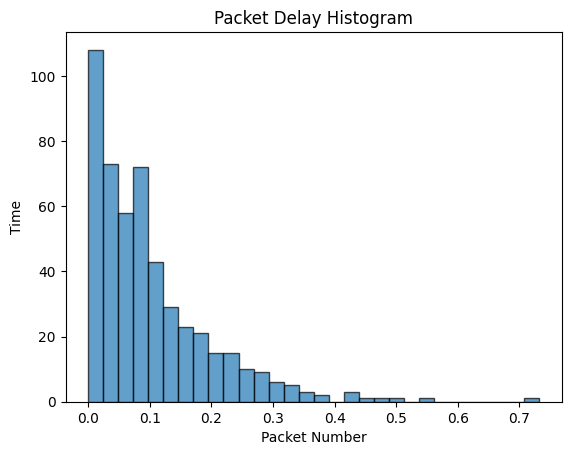

In [ ]:
# Include the code that generates the histogram

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/marcellobattista/Desktop/ecs132/Data/Traffic_data_orig.csv")

df["Delay"] = df["Time"].diff()  # calculates time[i] - time[i-1]

df = df.dropna()

plt.hist(df["Delay"], bins=30, edgecolor="black", alpha=0.7)


plt.xlabel('Packet Delay')
plt.ylabel('Frequency')
plt.title('Packet Delay Histogram')


plt.show()


3. Include the histogram (jpeg or pdf). You run the above code. Save the histogram as a pdf of jpeg file and then load it in a new markdown cell below. 

Histogram Plot



[Histogram Plot PDF](Project/delay_histogram.pdf)


### 4.3 A Simple Modulation Scheme

Alice and Bob decide to use the following modulation scheme to map the bits to the inter-packet delay. 

An inter-packet delay of 0.25 is used to encode a bit 0 

An inter-packet delay of 0.75 is used to encode a bit 1 


Write a Python code  that will generate the modified packet stream that contains the secret message.  Note that if $n$ is the number of secret bits you will need $n+1$ packets. Your code should generate a sequence of packets and their corresponding times and write in a file. Name the file Covert_Traffic_Data.csv. The file will contain 2 columns - packet number and the time. Assume first packet (P1) is sent at time 0. 

4. Include the code that generates the file Covert_Traffic_Data.csv in a new cell below. 

In [20]:
import csv

zero_delay = 0.25
one_delay = 0.75

delay_dict = dict()
delay_dict[0] = 0
count = 1

with open("/Users/marcellobattista/Desktop/ecs132/Jupyter Notebooks/Project/secret_message_bits.txt", "r") as f:
    for line in f:
        for char in line:
            if(char == '1'):
                delay_dict[count] = one_delay + delay_dict[count-1]
                count
            else:
                delay_dict[count] = zero_delay + delay_dict[count-1]
            count += 1

# Open a CSV file in write mode
with open("Convert_Traffic_Data.csv", "w", newline="") as f:
    writer = csv.writer(f)
    
    # Write the header
    writer.writerow(["Packet Number", "Time"])
    
    # Write the dictionary data
    for key, value in delay_dict.items():
        writer.writerow([key + 1, value])


    

### 4.4 Histogram of Inter-packet Delays of the Covert Stream

We will now plot the histogram of the inter-packet delays of the covert packet stream, i.e., the histogram inter-packet delays from the packet stream  in the file Covert_Traffic_Data.csv.

5. Include the code that generates the histogram of the inter-packet delay from the data in the file Covert_Traffic_Data.csv. Put this code in a new code cell below. 

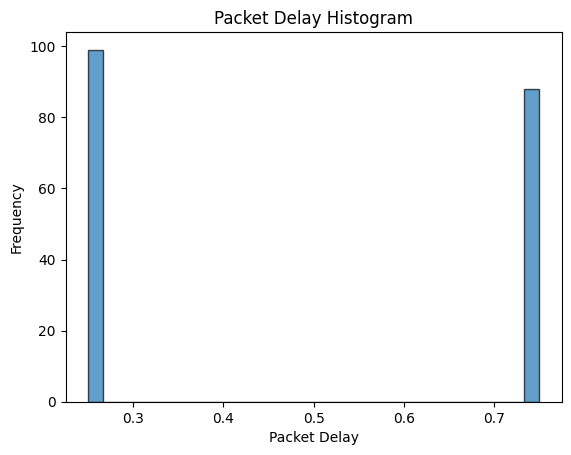

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/marcellobattista/Desktop/ecs132/Jupyter Notebooks/Convert_Traffic_Data.csv")

# Compute inter-packet delay (time difference between consecutive packets)
df["Delay"] = df["Time"].diff()  # This calculates time[i] - time[i-1]

# Drop NaN values (the first row will have NaN since there's no previous packet)
df = df.dropna()

plt.hist(df["Delay"], bins=30, edgecolor="black", alpha=0.7)


plt.xlabel('Packet Delay')
plt.ylabel('Frequency')
plt.title('Packet Delay Histogram')


plt.show()

6. Include the histogram (jpeg or pdf) of the inter-packet delays in a new markdown cell below. 

 7. Eve will compare the histogram in 6 with that of 3. Will Eve be suspicious? Briefly explain why? Answer in a new markdown cell below. 

Yes, Eve will be very suspicious because the distribution between delays only has two values 0.25 and 0.75. It is clear that the delay times are being tampered with and that it is not a natural distribution across the network. In the orginal traffic csv file, we see much more variation between packet delay times, compared to the stiff values between packets, that we see here.

### 4.5  A Better Modulation Scheme

Alice and Bob decide to use the following modulation scheme. 

Let $m$, $\min$, and $\max$ denote the median, min, and max of the inter-packet delay of the overt packet stream. 

1) If Alice needs to send a 0 she randomly generates a delay between $m$ and $\min$. 

2) If she want to send a 1 she randomly generates a delay between $m$ and $\max$. First, compute $m$, $\min$, and $\max$ of the overt packet stream. 


Next, modify the code  in  4.3, to generate  the covert  packet stream that contains  the secret message.

8. Include the code (in a new code cell below) that will that generates the Covert_Traffic_Data-V2.csv. 

In [9]:
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def random_delay(zero_one, min_max, median):
    
    if(zero_one == 1):
       return np.random.uniform(median, min_max)
    else:
        return np.random.uniform(min_max, median)
    

df = pd.read_csv("/Users/donsven/ECS132/Traffic_data_orig.csv")

df["Delay"] = df["Time"].diff()  # calculates time[i] - time[i-1] in new column "Delay"

df = df.dropna() # drops first row na value

min = df["Delay"].min()
max = df["Delay"].max()
median = df["Delay"].median()

zero_delay = 0
one_delay = 1

delay_dict = dict()
delay_dict[0] = 0
count = 1

with open("/Users/donsven/ECS132/secret_message_bits.txt", "r") as f:
    for line in f:
        for char in line:
            if(char == 1):
                delay_dict[count] = random_delay(one_delay, max, median) + delay_dict[count-1]
                count
            else:
                delay_dict[count] = random_delay(zero_delay, min, median) + delay_dict[count-1]
            count += 1

# Open a CSV file in write mode
with open("Convert_Traffic_Data-V2.csv", "w", newline="") as f:
    writer = csv.writer(f)
    
    # Write the header
    writer.writerow(["Packet Number", "Time"])
    
    # Write the dictionary data
    for key, value in delay_dict.items():
        writer.writerow([key + 1, value])

### 4.6 Histogram of Inter-packet Delays

Plot the histogram  of the inter-packet  delays of the overt packet stream and that of the new covert packet stream. Again, plot the histogram of the part of the packet stream that you need to encode the secret message. Do you think Eve will be suspicious?

9. Include the code that generates the histogram  of the inter-packet delays from Covert_Traffic_Data-V2.csv.  Put the code in a new code cell below. 

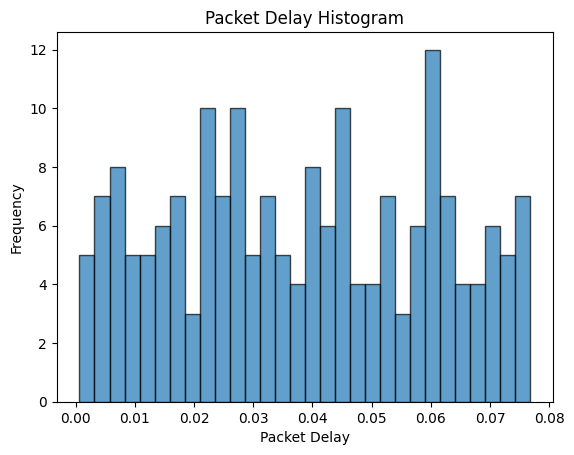

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/marcellobattista/Desktop/ecs132/Jupyter Notebooks/Convert_Traffic_Data-V2.csv")

# Compute inter-packet delay (time difference between consecutive packets)
df["Delay"] = df["Time"].diff()  # This calculates time[i] - time[i-1]

# Drop NaN values (the first row will have NaN since there's no previous packet)
df = df.dropna()

plt.hist(df["Delay"], bins=30, edgecolor="black", alpha=0.7)


plt.xlabel('Packet Delay')
plt.ylabel('Frequency')
plt.title('Packet Delay Histogram')


plt.show()

10. Include the histogram (jpeg or pdf) of the inter-packet delays from the packet stream in the file Covert_Traffic_Data-V2.csv. Put the histogram in new markdown cell below. 

11. Is this new scheme better? Briefly explain why? Put your answer in a new markdown cell below. 

This approach is slightly better, but it is still quite obvious that there has been tampering with the packet delay times. In our original delay histogram, we see a distribution of more packets being sent with shorter delays and much less sent with longer delays. In fact, in the original, the frequency of packets with higher delays decays as the time between packets increases. However, in this new packet distribution, we randomly select the delay times above and below the median, so we don't see a similar decay distrubution of the packet times. Instead, the delay times scattered along the min and max. 

### 4.7  Answer the following questions. 

For steps 12, 13, and 14, write your answer in a new markdown cell after each question. 

12. How can you improve upon the method in 4.5? Propose a scheme. You are not required to code it and show the results.  

We could use the same mean strategy to split the delay times down the middle. We then could calculate the distribution of the delays greater than the mean and the distribuition of those less than the mean. From there we could use this distribution to assign values to the packet delays > than the mean and < the mean, and create a packet delay distribution that looks much less suspicious.

13. In this first simple scheme we have implicitly assumed the Alice will buffer up the required number of packets 
and release them  and we mentioned that it was unrealistic. Why?

The artificial adjustments to the delay times will likely cause lag over the network and it will interrupt the quality of the skype call, which could look suspicious. Moreover, there is an upper limit on the amount of packets we can buffer over the network (150ms), and if the # of packets in the buffer becomes greater than max, then there will be an overflow, causing our program to crash. If we have 0 packets in the buffer, then we will have to wait for the next packet to arrive before we can send a packet, which will cause a delay in the communication.

 14. We have assumed that the network does not alter the inter-packet delays. What would be the problem if it did? Can you suggest methods to mitigate the effect of the changes in the inter-packet delays (noise)?

If the network noise alters the interpacket delays then we could accidentally delay the packet too much, or perhaps send a packet too early, causing the wrong bit value to be communicated across the network. To mitigate this we could attempt to use median filtering to remove outlier times, helping keep packet delay times above the average noise interference but below our upper limit for sending a 0. We could also send packets according to a moving average to smooth out fluctuations. 

## 5. A Real Implementation

In this section, we make the implementation more realistics and address some engineering issues.  

### 5.1 Overview

In the previous part, we assumed that Alice buffers as many packets she requires to transmit the secret message. For eaxmple, if the secret message is 32 bits then Alice will buffer 33 packets and release the packets with appropriate delays based on the encoding scheme to encode the secret message. If the secret message is small, this will work as Alice needs to buffer a small number of packets. However, this will not work if the secret message is long as this will require Alice to buffer large number of packets and this is unealistic (you have found and written good reasons in answering the related question in 4.7 above). 


We will denote $m$ to be the size of the secret message. Also let $B$ denote the maximum number of packets that can be buffered at anytime. The issue of having a large $B$ is that packets that are at the end of the buffer  must wait for all the packets that in the front to be transmitted. This may cause unacceptable delays for the packets. The value of $B$ will be determined by the overt application that ALice is using. For example, for real-time application (such as Augmented Reality/Virtual Reality applications) $B$ will be small whereas for Email application $B$ can be large.   In this study we will consider different values of $m$ and $B$ with $m \geq B$ and Alice, Eve and Bob know the value of $B$ since they all know what is the overt application Alice is using. 

Given $m$ and $B$ what should be Alice's strategy be to tranmit the secret message? There are two important constraints: 

1. Alice cannot buffer more than $B$ packets because of the reason above.
2. Once she starts to transmit the secret message she cannot stop (because she has no way of letting Bob know). She must try to compelete sending the entire secret message.

Alice follows the following strategy. Before starting to transmit the secret message she buffers $i$ ($0 \geq i \leq B$) packets and then starts to release the packets to transmit the secret message. In order to determine what should $i$ be we need to discuss two system states that we need to worry about - buffer overflow and buffer underflow. Let's understand what these are, why these can occur and what are the factors that determine when they will occur. 


1. **Buffer Overflow**: This happens when the buffer already has $B$ packets and another packet arrives from the application. Recall we have said that the number of packets in the buffer cannot exceed $B$. To build  intuition as to when this happens let's consider a specific scenario. Suppose we have set $B = 10$, $m = 32$ and $i=8$. Since $i = 8$,  Alice will first buffer 8 packets. As soon as the 8th packet arrives from the application, she will start transmitting packets with inter-packet delays that encode the secret message.  While she release the packet from the buffer, new packets may arrive from the application that will be appended to the buffer. So the number of packets in the buffer will keep changing - decrease when a packet is transmitted and increase when a packet is generated by the application. Suppose at some time there 7 packets in the buffer and before the next packet is to be transmitted 4 packets arrive in quick succession from the application. This will cause the number of packets in the buffer to go beyond 10 and that will be a violation of policy at most 10 packets can be buffered. Essentially, if packets arrive faster than they are transmitted out, there will be buffer overflow. If $i$ is set close to $B$ there is likely to be an overflow. 


2. **Buffer Underflow**: This happens when a packet must be transmitted (to encode a bit of the secret message) but there are no packets in the buffer. Recall the constraint that once Alice starts to transmit the secret message she cannot stop. Hence, if packets arrive slower than they are transmitted there is likely  be buffer underflow. If $i$ is set close to 0, there is likely to be an underflow. 


**If either of the above two cases (buffer overflow and buffer underflow) arise during the process of sending the secret message we will consider that to be a failure of the covert channel. 


There are many factors that will determine if the covert channel will go into overflow and underflow. These include $m$, $B$, $i$, distribution of the inter-packet delay of the overt application, and the encoding scheme. In this part of the project we will write a simulation to study some of the above factors on the success of transmitting a secret message.  The overall sender-side system is shown in the Figure below. 


<figure> 
    <img src="Figures/ctc-implementation.jpg" width="600" height="400">
    <figcaption align = "center"><b>The overall system diagram of the source and the covert sender. </b></figcaption>
</figure>



### 5.2 Assumptions

  1. We will consider that the source generates packet following well-known IPD distributions. Specifically, we will consider two cases a) Exponential and b) Uniform. The sender (Alice) also knows this distribution and follows it to inject the delay between the packets to embed the secret message. It is important to note that the source and the sender are independent. Hence, even though they follow the same distribution,  the sequence of delays generated by the source will be different from the sequence of delays generated by the sender.
  
  2. To embed a 0, the sender generates a delay between the minimum value (min) and the median. To embed a 1 the sender generates a delay between the median value and the maximum value (max). Note that  for the Uniform distribution the min, max and median are easy to determine. For the Exponential distribution min is 0, the max is $\infty$. What is the median value of an Exponential distribution with rate parameter $\lambda$ pkts/sec?
  
  3. The secret message is a randomly generated sequence of 1s and 0s of size $m$ bits and is given. We will consider two values $m=16, 32$.
  
  4. The sender has a buffer of size $B$ and initially the sender buffers $i$ packets before starting to send the secret message.
  

### 5.3 Project Steps 

  1. For  buffer size $B=20$ we want to find out the probability of overflow  and  underflow, when the IPD follows the Exponential with $\lambda =1$ pkts/sec and $i=2, 6, 10, 14, 18$. Use message size $m = 16, 32$ bits. Tabulate the results. Remember that to determine the probability you need to run multiple (say 500) experiments for each parameter, i.e., for $B = 20, m = 16, i = 2$ run 500 experiments  and determine the probability of overflow and underflow. Similarly for other values of $i$ and $m$. The max value of an Exponential distribution is $\infty$. For this study  we can limit the max value to say 5 ~secs$. 
  
  2. For  buffer size $B=20$ we want to find out the probability of overflow  and  underflow, when the IPD follows the Uniform distribution in the range (0,1)  and $i=2, 6, 10, 14, 18$. Use message size $m = 16, 32$ bits.  Tabulate the results. Remember that to determine the probability you need to run multiple (say 500) experiments for each parameter, i.e., for $B = 20, m = 16, i = 2$ run 500 experiments  and determine the probability of overflow and underflow. Similarly for other values of $i$ and $m$.

  
  3. Propose methods to deal with buffer overflow and underflow.

### 5.4 Notes on Simulating the Implementation

For steps 1 and 2, since the source and the sender are independent processes, a proper way to simulate would be using a  discrete event simulation module such as simpy in Python.  However, we can simplify and just use standard Python. To do this,  we can pre-generate the times when the source generates packets and store it in a list. Then we can write the code to simulate the buffer, the encoding scheme, and  the sender. This can be done in a single "process." Based on this, following is a very **rough** set of steps to simulate the system.

For each experiment we can break it down to the following steps


 1. Generate the random bit pattern of 1s and 0s of size $m$ which is the secret message.

 2. Generate a sequence of times when the source will generate the packets. This is based inter-packet delay (IPD) distribution of the packets generate by the source. You can intuit what is the worst case number of packets that you need.

 3. For the buffer you need to keep some  variables such as B: buffer size, i: the initial buffer size to start sending he secret message bits and CB: current buffer size.

 4. For the sender you need to maintain some variables such as the time when the next packet will be sent.

 5. For each secret message bit:


       a. Generate a delay following the encoding scheme and hence determine when  the next packet will be transmitted.
       
       b. Update the state of the buffer depending on the number of arrivals during that time.
       
       c. At appropriate places check for buffer underflow and overflow and break out if it is the case.
       
       d. Appropriately update the current time.


  6. Do the experiment multiple times to calculate the different probabilities.
  

15. Include the code that you used to generate the results for Steps 1 and 2.  You should write only one code with the distribution of the inter-packet delays chosen as a parameter. Put your code in a new code cell below. 

In [ ]:
#Experiment Case A: Exponential Distribution
import random
import numpy as np
import math
import scipy.stats
import pandas as pd


def simulation(lamb, m, i, B, bit_pattern, times):
    # Calculate median for exponential distribution with lambda=1
    median = np.log(2)
    cb = i  # current buffer size
    current_time = 0
    next_packet_time = 0
    time_index = 0  # Keep track of which arrival times we've processed

    for bit in bit_pattern:
        # Generate delay based on bit value
        if bit == 0:
            delay = np.random.uniform(0, median)
        else:
            delay = np.random.uniform(median, 5)
        
        next_packet_time = current_time + delay
        
        # Count arrivals between current_time and next_packet_time
        while time_index < len(times) and times[time_index] < next_packet_time:
            cb += 1
            time_index += 1
            
            # Check for overflow
            if cb > B:
                return "overflow"
        
        current_time = next_packet_time
        
        # Send packet
        cb -= 1
        
        # Check for underflow
        if cb < 0:
            return "underflow"
    

    return "success"  


def main():

    # set variables
    B = 20 # buffer size
    m_sizes = [16,32] # size of secret message
    i_values = [2,6,10,14,18] # initial buffer size
    lamb = 1 # rate parameter; pkts/sec

    # Run simulations and collect results
    results = []
    num_trials = 500

    for m in m_sizes:
        for i in i_values:
            counts = {"underflow": 0, "overflow": 0, "success": 0}
            for _ in range(num_trials):
            # Step 1
                bit_pattern = [random.randint(0, 1) for i in range(m)]

                # Step 2
                worst_case_packets = m+1+i
                
                times = np.random.exponential(scale=lamb, size=worst_case_packets)
                arrival_times = np.cumsum(times)
                arrival_times = arrival_times.tolist()
            
                outcome = simulation(lamb, m, i, B, bit_pattern, arrival_times)
                counts[outcome] += 1

            # Compute probabilities
            total = num_trials
            results.append([
                m, i, 
                counts["underflow"] / total, 
                counts["overflow"] / total, 
                counts["success"] / total
            ])

    # Convert results to DataFrame
    df = pd.DataFrame(results, columns=["M Size", "i", "Underflow", "Overflow", "Success"])
    df.insert(0, "Source Distribution", "Exponential")  # Add first column

    # Calculate probabilities
    # Display in a formatted way
    print(df)
    


main()


  Source Distribution  M Size   i  Underflow  Overflow  Success
0         Exponential      16   2      0.206     0.000    0.794
1         Exponential      16   6      0.018     0.092    0.890
2         Exponential      16  10      0.004     0.564    0.432
3         Exponential      16  14      0.000     0.782    0.218
4         Exponential      16  18      0.000     0.954    0.046
5         Exponential      32   2      0.270     0.188    0.542
6         Exponential      32   6      0.042     0.602    0.356
7         Exponential      32  10      0.002     0.896    0.102
8         Exponential      32  14      0.000     0.950    0.050
9         Exponential      32  18      0.000     0.996    0.004


In [101]:
#Experiment Case B: Uniform Distribution

import random
import numpy as np
import math
import scipy.stats
import pandas as pd


def simulation(lamb, m, i, B, bit_pattern, times, mean):
    cb = i  # current buffer size
    current_time = 0
    next_packet_time = 0
    time_index = 0  # Keep track of which arrival times we've processed

    for bit in bit_pattern:
        # Generate delay based on bit value
        if bit == 0:
            delay = np.random.uniform(0, mean)
        else:
            delay = np.random.uniform(mean, 1)
        
        next_packet_time = current_time + delay
        
        # Count arrivals between current_time and next_packet_time
        while time_index < len(times) and times[time_index] < next_packet_time:
            cb += 1
            time_index += 1
            
            # Check for overflow
            if cb > B:
                return "overflow"
        
        current_time = next_packet_time
        
        # Send packet
        cb -= 1
        
        # Check for underflow
        if cb < 0:
            return "underflow"
    

    return "success"  


def main():

    # set variables
    B = 20 # buffer size
    m_sizes = [16,32] # size of secret message
    i_values = [2,6,10,14,18] # initial buffer size
    lamb = 1 # rate parameter; pkts/sec

    # Run simulations and collect results
    results = []
    num_trials = 500

    for m in m_sizes:
        for i in i_values:
            counts = {"underflow": 0, "overflow": 0, "success": 0}
            for _ in range(num_trials):
            # Step 1
                bit_pattern = [random.randint(0, 1) for i in range(m)]

                # Step 2
                worst_case_packets = m+1+i
                
                times = np.random.uniform(0,1,size=worst_case_packets)
                mean = np.mean(times)
                arrival_times = np.cumsum(times)
                arrival_times = arrival_times.tolist()
            
                outcome = simulation(lamb, m, i, B, bit_pattern, arrival_times, mean)
                counts[outcome] += 1

            # Compute probabilities
            total = num_trials
            results.append([
                m, i, 
                counts["underflow"] / total, 
                counts["overflow"] / total, 
                counts["success"] / total
            ])

    # Convert results to DataFrame
    df = pd.DataFrame(results, columns=["M Size", "i", "Underflow", "Overflow", "Success"])
    df.insert(0, "Source Distribution", "Uniform")  # Add first column

    # Calculate probabilities
    # Display in a formatted way
    print(df)


main()


  Source Distribution  M Size   i  Underflow  Overflow  Success
0             Uniform      16   2      0.402     0.000    0.598
1             Uniform      16   6      0.026     0.000    0.974
2             Uniform      16  10      0.000     0.002    0.998
3             Uniform      16  14      0.000     0.056    0.944
4             Uniform      16  18      0.000     0.406    0.594
5             Uniform      32   2      0.622     0.000    0.378
6             Uniform      32   6      0.090     0.000    0.910
7             Uniform      32  10      0.008     0.018    0.974
8             Uniform      32  14      0.000     0.164    0.836
9             Uniform      32  18      0.000     0.590    0.410


16. Table of results here for Step 1 (IPDs follow Exponential Distribution). Put the table in a new Markdown cell below. 

If you double click the cell below, the data will appear in table format

  Source Distribution  M Size   i  Underflow  Overflow  Success
0         Exponential      16   2      0.206     0.000    0.794
1         Exponential      16   6      0.018     0.092    0.890
2         Exponential      16  10      0.004     0.564    0.432
3         Exponential      16  14      0.000     0.782    0.218
4         Exponential      16  18      0.000     0.954    0.046
5         Exponential      32   2      0.270     0.188    0.542
6         Exponential      32   6      0.042     0.602    0.356
7         Exponential      32  10      0.002     0.896    0.102
8         Exponential      32  14      0.000     0.950    0.050
9         Exponential      32  18      0.000     0.996    0.004

17. Table of results here for Step 2. (IPDs follow Uniform Distribution). Put the table in a new Markdown cell below. 

If you double click the cell below, the data will appear in table format

  Source Distribution  M Size   i  Underflow  Overflow  Success
0             Uniform      16   2      0.402     0.000    0.598
1             Uniform      16   6      0.026     0.000    0.974
2             Uniform      16  10      0.000     0.002    0.998
3             Uniform      16  14      0.000     0.056    0.944
4             Uniform      16  18      0.000     0.406    0.594
5             Uniform      32   2      0.622     0.000    0.378
6             Uniform      32   6      0.090     0.000    0.910
7             Uniform      32  10      0.008     0.018    0.974
8             Uniform      32  14      0.000     0.164    0.836
9             Uniform      32  18      0.000     0.590    0.410

Sample Results for Steps 1 and 2. 

Source Distribution = Exponential
M Size      i             Underflow         Overflow      Success  
16           2             0.382              0.134        0.484    
16           6             0.058              0.294        0.648    
16           10            0.006              0.524        0.470    
16           14            0.000              0.710        0.290    
16           18            0.000              0.876        0.124    
32           2             0.404              0.400        0.196    
32           6             0.062              0.664        0.274    
32           10            0.014              0.830        0.156    
32           14            0.000              0.906        0.094    
32           18            0.000              0.958        0.042    



Source Distribution = Uniform
M Size      i             Underflow         Overflow      Success  
16           2             0.652              0.000        0.348    
16           6             0.080              0.000        0.920    
16           10            0.000              0.000        1.000    
16           14            0.000              0.040        0.960    
16           18            0.000              0.330        0.670    
32           2             0.772              0.000        0.228    
32           6             0.238              0.004        0.758    
32           10            0.024              0.022        0.954    
32           14            0.002              0.158        0.840    
32           18            0.000              0.460        0.540 

18. Can you propose one scheme to deal with buffer overflows and underflows? Write you answer in a new markdown cell below. 

19. Give a version of the code that I can run for different values of the parameters, namely, a) inter-packet delay distribution (Uniform or Exponential), 2) size of the secret message and 3) value of $i$. Name the file "real_implementation_code.py."  Your code should ask for the three inputs and output the Underflow, Overflow, and Success probabilities. 

Write how to run the code in the new markdown cell below.  

When you run the code, you will be asked first to input the distribution you want. Type in (case sensitive) either: 'Uniform' or 'Exponential' (without the apostrophes).

Next, it will ask you to enter the size of the secret message (m). Simply enter and integer value such as: 16, 25, etc.

Lastly, it will ask you to enter a starting buffer size (i). Simply enter an integer value between 0-20. 

## 6 A Simple Analysis
 
In this section we will do a simple analysis of above approach using the Gambler Ruin's problem. Keep in mind that it is approximate. The idea to see how the implementation can be mapped into a well known problem.

### 6.1 Gambler's Ruin Problem

Two players A and B play a game which consists of a sequence of rounds; in each round they bet 1 dollar. If A wins the round, A gets 1 dollar from B, if he loses, A gives 1 dollar to B. The probability  that A wins a round is $p$ and hence the probability that A loses a round is $q = 1 - p$. Suppose A and B combined have $N$ dollars of which A has $i$ dollars and B $N - i$ dollars and they continue to play until A has $N$ dollars and  wins the game (and hence B becomes bankrupt) or A has 0 dollars and loses the game (hence A becomes bankrupt). We want to find the probability $P_i$ that A wins the game starting  with $i$ dollars.

The basic strategy is to condition on the first step and using the Law of Total Probability. Starting in state $i$, in one round, A can win with probability $p$ and go to state $i+1$ or loose with probability $q$ and mpove to state $i - 1$. Since $P_i$ is the probability that A wins the game starting  with $i$ dollars, we have following recurrence equation

\begin{equation*}
        P_i = p P_{i+1} + q P_{i-1}  ~~~~~~~~ 1  \leq i \leq N -1
\end{equation*}

with $P_0 = 0$ and $P_N = 1$.

Since $p+q =1$, we can rewrite the above equation as

\begin{align*}
       (p+q)  P_i &= p P_{i+1} + q P_{i-1}  ~~~~~~~~ 1  \leq i \leq N -1  \\
       p P_{i+1} - p  P_i &= q  P_i - q P_{i-1}  \\
        P_{i+1} - P_i &= \frac{q}{p} (P_i - P_{i-1}) \\
\end{align*}


For $i = 1$, the equation can be written as:


\begin{align*}
        P_{2} - P_1 &=  \frac{q}{p} (P_1 - P_{0}) \\
        P_{2} - P_1 &=  \frac{q}{p} P_1
\end{align*}

Similarly for $i = 2$ we can easily show that:


\begin{align*}
        P_{3} - P_2 &=  \frac{q}{p} (P_2 - P_{1}) \\
        P_{3} - P_2 &= ( \frac{q}{p})^2 P_1
\end{align*}


and for $i = N-1$


\begin{align*}
        P_{N} - P_{N-1} &=  \frac{q}{p} (P_{N-1} - P_{N-2}) \\
        P_{N} - P_{N-1} &= ( \frac{q}{p})^{N-1} P_1
\end{align*}


Now if we take the first $i-1$ terms and sum them  we will get:


\begin{align*}
        P_{i} - P_{1} &=  P_{1} [\frac{q}{p}  + (\frac{q}{p})^{2} + \ldots  + ( \frac{q}{p})^{i-1} ] \\
\end{align*}


We can show that:


\begin{equation*}
P_i  =
    \begin{cases}
    \frac{1 - (\frac{q}{p})^i}{1 - (\frac{q}{p})} P_1   &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} \neq 1 \\
    i P_1  &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} = 1
    \end{cases}
\end{equation*}


Considering $\frac{q}{p} \neq 1$  and using the fact $P_N = 1$, we have


\begin{align*}
        P_N &= 1 \\
            &= \frac{1 - (\frac{q}{p})^N}{1 - (\frac{q}{p})} P_1
\end{align*}


From which we obtain:


\begin{equation*}
P_1 =  \frac{1 - (\frac{q}{p})}{1 - (\frac{q}{p})^N}
\end{equation*}


Similarly, if $\frac{q}{p} = 1$, then $P_N = 1 = N P_1$ which implies that $P_1 = \frac{1}{N}$ and thus $P_i = \frac{i}{N}$, now we have:


\begin{equation*}
P_i  =
    \begin{cases}
    \frac{1 - (\frac{q}{p})^i}{1 - (\frac{q}{p})^N}   &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} \neq 1 \\
    \frac{i}{N}  &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} = 1
    \end{cases}
\end{equation*}



### Notes and Remarks

1. We first show that $p = q$ is a limiting case of $p \neq q$. Let $x = \frac{q}{p}$. We want to find the limit of $P_i$ as $x \rightarrow 1$.


\begin{align*}
\lim_{x \to 1} P_i &= \lim_{x \to 1} \frac{1 - x^i}{1 - x^N} \\
 											  &=& \frac{i}{N}
\end{align*}


2. Does the game go forever? 

Consider the case with $\frac{q}{p} = 1$. $P(\text{A wins starting with $i$)}) = P_i =  \frac{i}{N}$. Similarly, $P(\text{A loses starting with $i$}) = P(\text{B wins starting with $N-i$}) = \frac{N-i}{N}$. Since the probability of A winning or B winning is equal to 1, then the probability  of neither winning (game going forever) is 0.

3. Let $i = N - i$, i.e., $i = \frac{N}{2}$ . Also let $p = 0.49$

    3.1\. $N = 20 \Rightarrow P_i = 0.4$

    3.2\. $N = 100 \Rightarrow P_i = 0.12$

    3.3\. $N = 200 \Rightarrow P_i = 0.02$

4.  If $p < q$ which implies $x = \frac{q}{p} > 1$, then


\begin{align*}
\lim_{N \to \infty} P_i &= \lim_{N \to \infty} \frac{1 - x^i}{1 - x^N} \\
 											  &=&0
\end{align*}

This implies that with probability 1, the Gambler will get "ruined" if she chooses to play the game for an "infinite" number of rounds.

### 6.2 A Simple Analysis 

Coming back to our project, can you map the implementation that you did in Section 5 to the Gambler's ruin problem? Your goal is to create a table as in Section 5.6 based on the results that we have derived in the above section. There are many similarities but there are some limitations as well. 

### 6.3 Model 
Write a short paragraph how the implementation in Section 5 can be mapped to the Gambler's Ruin problem.  What is the limitation of using the model?  

20. Write your paragraph in a new markdown cell  below. 

### 6.5 Model Results 
For the parameters given in  Step 1 in Section 5.3 (i.e., for the case of the Exponential distribution) determine the overflow  and underflow probabilities for different values of $i$ using the Gambler's Ruin problem. 

21. Put your table and a short discussion how you got the values in a new markdown cell below. 

## 7 Detection 

In this section we will investigate some simple appropaches to detect timimng channels. This is the task of Eve. 

As mentioned in Section 4.2,  we assume that Eve has a packet stream that is "clean" i.e., it is not modified by a timing channel. Eve can derive many features from this packet stream. One that we have focussed in Section 4.2 is the distribution of the inter-packet delay. (You may reflect on what other fetaures you could consider.)

Given the baseline inter-packet delay distribution, what Eve will do is the following 

1. Take a sample of the packet stream when Alice and Bob talk
2. Extract the inter-packet delay distribution
3. Compare with the baseline 
4. Flag if the distributions are different

There are many engineering issues with each of the above steps but here we will focus on Steps 3 and 4. The basic problem is the following. We have two sets of inter-packet delay samples. We want to know if they are from the same distribution. You can guess that this must be common problem and there must be many different approaches. Yes there are many methods. There are qualitative approcheas such as l comparing the boxplots, the cummulative distribution finctions, the histograms, the Q-Q plot, and the Kernel density functions. There are quantitative statistical test such the T-test, Mann–Whitney U Test, the Kolmogorov–Smirnov test, among others.  For this project we will focus on the Q-Q plot. 

### 7.1 Q-Q Plot

In Q-Q plot \[Q stands for quantile\], the quantiles of the two distributions are plotted against each other. If the distributions are the same, we should get a 45-degree line.

We will use two Python modules numpy and statsmodels.  You must install these modules either using pip3 or  conda. 

The basic function is qqplot. It by default plots quantiles with respect to quantiles of the standard normal (Z) distribution. 


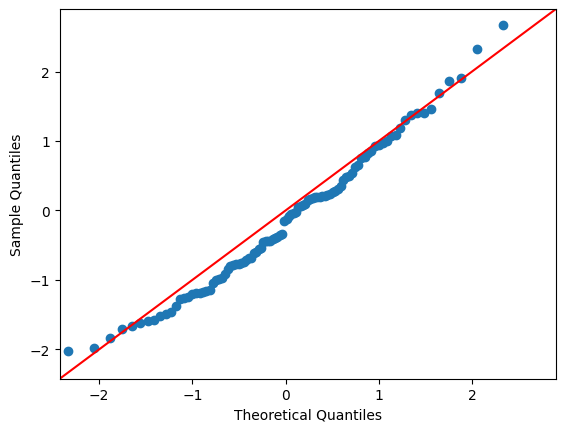

In [3]:
import numpy as np
import statsmodels.api as sm
import pylab as py
  
# Generate 100 samples from a standard normal (Z) distribution
sample_data1 = np.random.normal(0, 1, 100)
sm.qqplot(sample_data1, line ='45')

py.show()

\[ I have not figured out how to resolve the warning. If someone does, please let me know\]

In the above code see what happens when you increase the number of samples to 1000 and then to 10000. 

Next we generate sample from an Exponential distribution  with rate $\lambda =1 $  and get the Q-Q plot. 

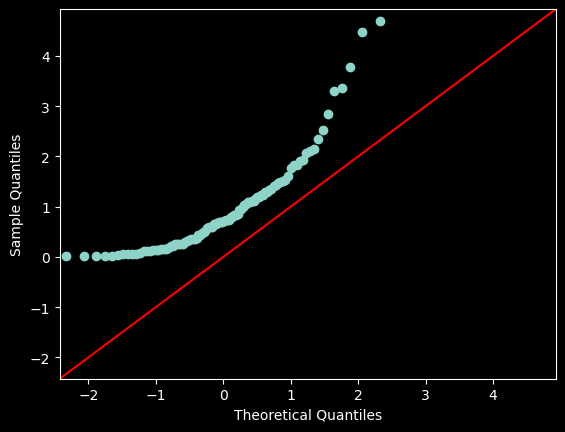

In [11]:
# Generate 100 samples from an exponential distribution with rate $\lambda =1 $
sample_data1 = np.random.exponential(1, 100)
sm.qqplot(sample_data1, line ='45')
py.show()

### 7.2 Q-Q Plot with 2 Samples 

qqplot_2samples gives the Q-Q plots for the quantiles derived from two data sets. We will consider the size of both samples to be the same althougth it is not required. In the following code see what happens as you increase the number of samples

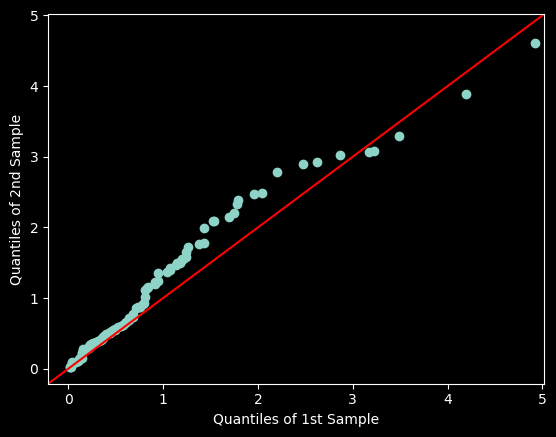

In [12]:
# Generate 100 samples from an exponential distribution with rate $\lambda =1 $
sample_data1 = np.random.exponential(1, 100)
# Generate another 100 samples from the  exponential distribution with rate $\lambda =1 $
sample_data2 = np.random.exponential(1, 100)
sm.qqplot_2samples(sample_data1, sample_data2, line ='45')
py.show()

### 7.3 A Simple Task

For this project, using the qqplot_2samples, get the Q-Q plot of the inter-packet delays generated in Section 4.5 with that of the baseline. Use only the inter-packet delays that contain the the secret message. Use the same number of inter-packet delays from the baseline traffic. 

22. Include the code and that will generate the plot in a cell below. 

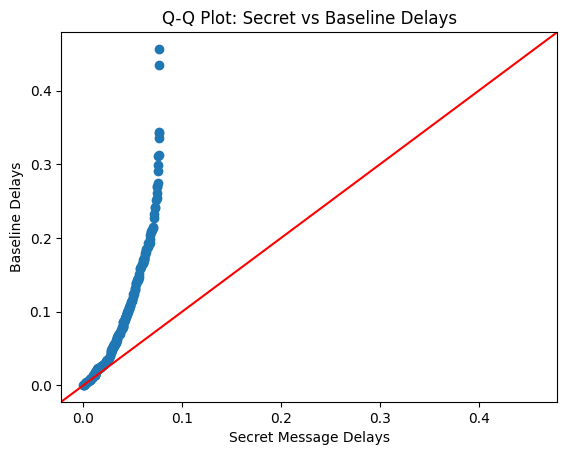

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load secret-message delays
secret = pd.read_csv("Convert_Traffic_Data-V2.csv")
secret_delays = secret["Time"].diff().dropna().values

# Load baseline data and compute delays
baseline = pd.read_csv("/Users/donsven/ECS132/Traffic_data_orig.csv")
baseline["Delay"] = baseline["Time"].diff()
baseline = baseline.dropna()

sampled_baseline = baseline["Delay"].sample(n=len(secret_delays), random_state=42).values

sm.qqplot_2samples(secret_delays, sampled_baseline, line='45')
plt.title("Q-Q Plot: Secret vs Baseline Delays")
plt.xlabel("Secret Message Delays")
plt.ylabel("Baseline Delays")
plt.show()


23. Include the plot (pdf, jpeg, or png) in a new markdown cell below. 

![Q-Q Plot: Secret vs Baseline Delays](/Users/donsven/ECS132/Secret\ vs\ Baseline\ Delays.png)

## 8 Finishing up

24. If you have a partner for this project, please put the names of the team members (i.e., both the names if you worked in a team of 2) in new markdown cell below.

Marcello Battista, Nelson Lee

25. Please provide  feedback about the project, specifically, how it can be improved.  Please put your comments in a new markdown cell below. 

### Submission and Grading Guidelines 

1. For this project  there is one input file and input figures (the drawings). You will write code  which will generate results, figures, and files. 

2. Put this jupyter notebook, the input file, input figures, the new figures and files you generate in one folder. Make sure that paths are set properly so that the figures will render when I open the notebook. 

3. For Step 18,  you need to include a version of the code that I can run by changing the parameters. See Step 18 for details. 

4. Submit a zipfile of the folder. 

5. If you are working in a team, each member of the team must submit the same zip file. 

6. There may be interactive grading. 